In [9]:
import seaborn
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [27]:
df = pd.read_csv("CoffeeBeansCleaned.csv")
df2 = pd.read_csv("CoffeeBeansCleaned.csv")

In [28]:
df2.head()

,Variety,Shape,Sieve,Aroma,Flavor,Aftertaste,Acidity,Body,Uniformity,Balance,clean cup,Sweetness,Taster´s score,Final score
0,CO,PE,13,6.50,6.00,6.00,6.00,6.0,10.0,6.0,10,10,6.0,72.50
1,CO,PE,13,6.00,6.00,6.00,6.00,6.0,10.0,6.0,10,10,6.0,72.00
2,CO,PE,13,6.75,6.00,6.00,6.00,6.0,10.0,6.0,10,10,6.0,72.75
3,CO,PE,13,6.75,6.50,6.50,6.00,6.0,10.0,6.0,10,10,6.0,73.75
4,CO,MI,13,6.75,6.25,6.25,6.25,6.5,10.0,6.5,10,10,6.5,75.00


In [29]:
#Splitting
X = df.drop(['Shape'], axis = 1)
y = df['Shape']

training, testing, training_labels, testing_labels = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y, random_state=42)

# check the shape of X_train and X_test
training.shape,testing.shape

((145, 13), (37, 13))

In [30]:
ord_enc = OrdinalEncoder()
training["Sieve"] = ord_enc.fit_transform(training[["Sieve"]])
training["Variety"] = ord_enc.fit_transform(training[["Variety"]])
testing["Sieve"] = ord_enc.fit_transform(testing[["Sieve"]])
testing["Variety"] = ord_enc.fit_transform(testing[["Variety"]])



In [31]:
#Normaalization
# Normalize the data
sc = StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(training), columns = training.columns)
#normed_test_data = pd.DataFrame(sc.fit_transform(testing), columns = testing.columns)

# Building the Random Forest

In [32]:
clf=RandomForestClassifier()
clf.fit(training, training_labels)

RandomForestClassifier()

In [33]:
preds = clf.predict(testing)

In [34]:
print (clf.score(training, training_labels))
print(clf.score(testing, testing_labels))

0.9862068965517241
0.7567567567567568


In [35]:
clf = DecisionTreeClassifier()

In [36]:
clf = clf.fit(training, training_labels)

In [37]:
y_pred = clf.predict(testing)

In [38]:
print("Accuracy:",metrics.accuracy_score(testing_labels, y_pred))

Accuracy: 0.8378378378378378


In [45]:
# Building the Decision Tree

In [40]:
dtree=DecisionTreeClassifier()
dtree.fit(training, training_labels)

DecisionTreeClassifier()

In [42]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

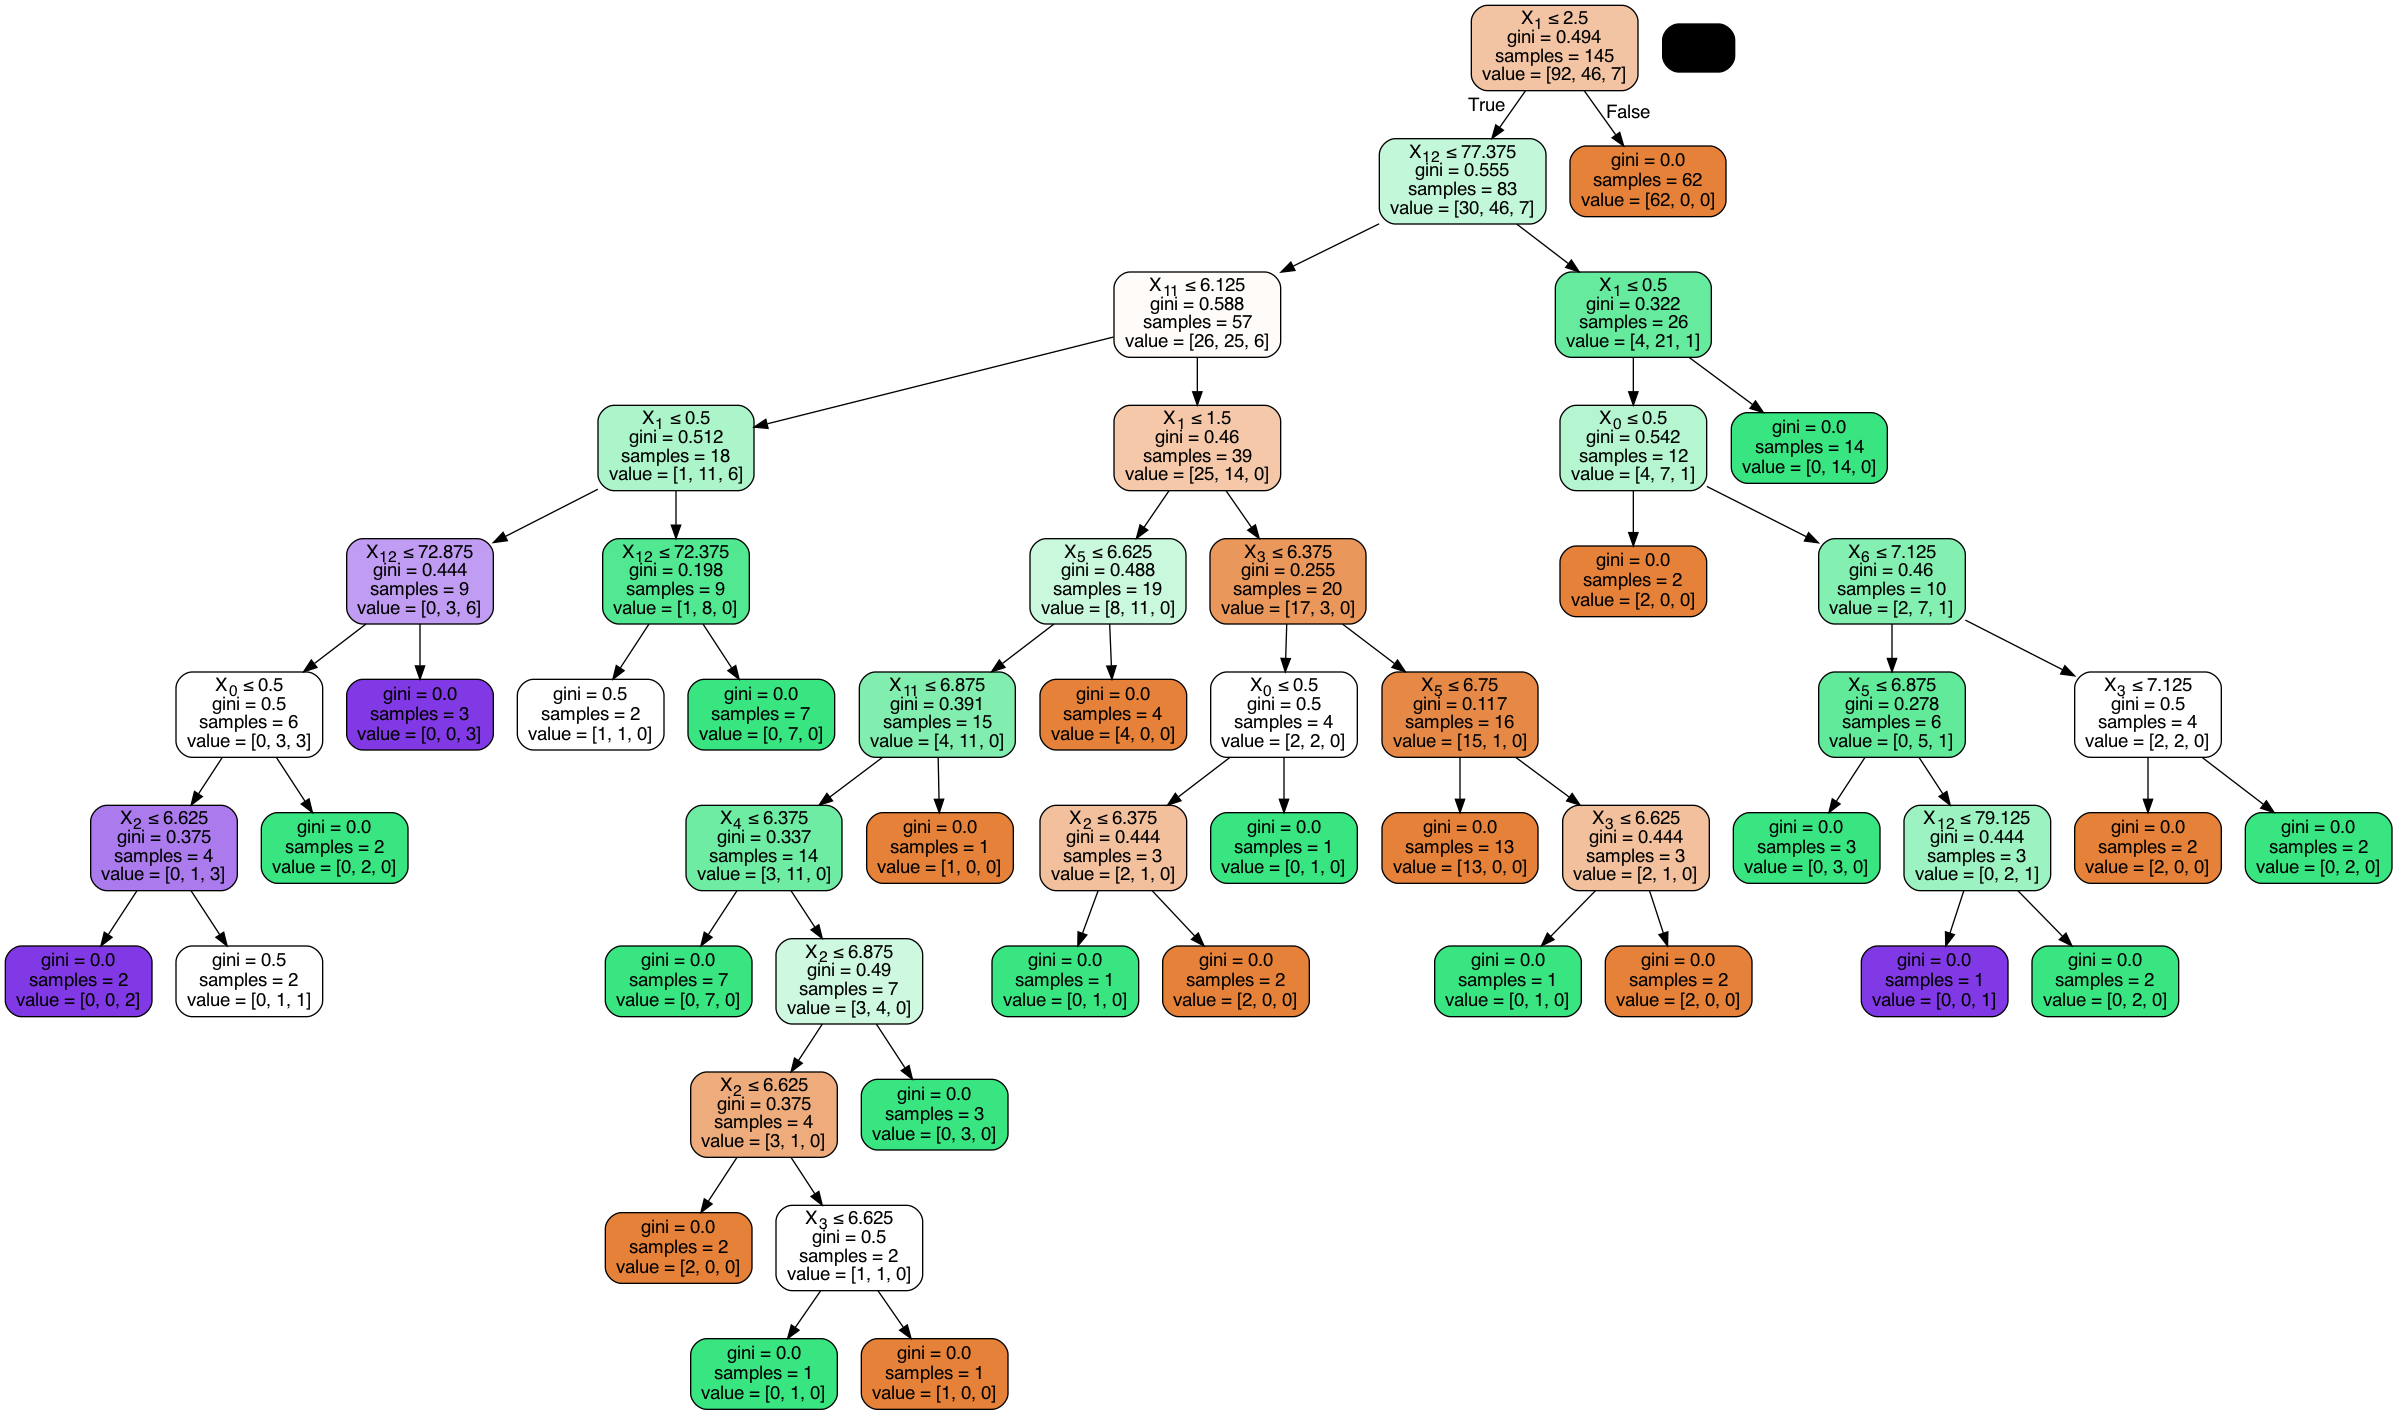

In [44]:
Image(graph.create_png())